In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('D:\\CV DA Assignment\\Project Presentation\\Google play store\\Google-Playstore.csv')

In [3]:
dataset.shape

(2312944, 24)

In [4]:
df=dataset.copy()

In [5]:
df.shape

(2312944, 24)

In [6]:
## Column Rename 

for col in df.columns:
    col1 = col.replace(' ','_')
    df = df.rename(columns={col:col1})
df.columns

Index(['App_Name', 'App_Id', 'Category', 'Rating', 'Rating_Count', 'Installs',
       'Minimum_Installs', 'Maximum_Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum_Android', 'Developer_Id', 'Developer_Website',
       'Developer_Email', 'Released', 'Last_Updated', 'Content_Rating',
       'Privacy_Policy', 'Ad_Supported', 'In_App_Purchases', 'Editors_Choice',
       'Scraped_Time'],
      dtype='object')

In [7]:
## Dropping of unnecessary columns

print ("Dropping the following columns - App_Id, Developer_Email, Privacy_Policy, Currency,Installs, Developer_Id, Scraped_Time,Maximum_Installs which are not needed for the analysis purposes.")

df.drop(['App_Id','Developer_Website','Developer_Email','Privacy_Policy','Currency','Installs','Scraped_Time','Minimum_Installs'],axis=1,inplace=True)


Dropping the following columns - App_Id, Developer_Email, Privacy_Policy, Currency,Installs, Developer_Id, Scraped_Time,Maximum_Installs which are not needed for the analysis purposes.


In [8]:
df.columns

Index(['App_Name', 'Category', 'Rating', 'Rating_Count', 'Maximum_Installs',
       'Free', 'Price', 'Size', 'Minimum_Android', 'Developer_Id', 'Released',
       'Last_Updated', 'Content_Rating', 'Ad_Supported', 'In_App_Purchases',
       'Editors_Choice'],
      dtype='object')

In [9]:
## Rename Minimum_installs as No.of. Installs
df.rename(columns = {'Maximum_Installs':'Installs'}, inplace = True)

In [10]:
df.rename(columns = {'Free':'App_Free'}, inplace = True)

In [11]:
df.columns

Index(['App_Name', 'Category', 'Rating', 'Rating_Count', 'Installs',
       'App_Free', 'Price', 'Size', 'Minimum_Android', 'Developer_Id',
       'Released', 'Last_Updated', 'Content_Rating', 'Ad_Supported',
       'In_App_Purchases', 'Editors_Choice'],
      dtype='object')

In [12]:
df.shape

(2312944, 16)

In [13]:
df=df.dropna()

In [14]:
df.shape

(2235298, 16)

In [15]:
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000

In [16]:
df['Size']=df['Size'].apply(define_size)

In [17]:
df['Category'] = df['Category'].replace(['Music & Audio'], 'Music')

In [18]:
## replace Content_Rating values

df['Content_Rating']=df['Content_Rating'].replace({'Unrated':'Everyone',
                                 'Mature 17+':"Adults",
                                 'Adults only 18+':"Adults",
                                 'Everyone 10+':"Everyone"}) 

In [19]:
## replace Rating_Count into Rating_range values

df['Rating_Range'] = 'NoRating'
df.loc[(df['Rating_Count'] > 0) & (df['Rating_Count'] <= 10000.0),'Rating_Range'] = 'Less than 10K'
df.loc[(df['Rating_Count'] > 10000) & (df['Rating_Count'] <= 500000.0),'Rating_Range'] = 'Between 10K and 500K'
df.loc[(df['Rating_Count'] > 500000) & (df['Rating_Count'] <= 138557570.0),'Rating_Range'] = 'More than 500K'
df.Rating_Range.value_counts()

Less than 10K           1164934
NoRating                1034388
Between 10K and 500K      34386
More than 500K             1590
Name: Rating_Range, dtype: int64

In [20]:
## replace Rating_Count into Rating_range values

df.loc[(df['Rating'] >= 1) & (df['Rating'] < 2),'Rating'] = 1
df.loc[(df['Rating'] >=2) & (df['Rating'] <3),'Rating'] = 2
df.loc[(df['Rating'] >=3) & (df['Rating'] <4),'Rating'] = 3
df.loc[(df['Rating'] >=4) & (df['Rating'] <5),'Rating'] = 4
df.loc[(df['Rating'] >=5) & (df['Rating'] <6),'Rating'] = 5
df.Rating.value_counts()

0.0    1034388
4.0     703666
3.0     316882
5.0      98340
2.0      69475
1.0      12547
Name: Rating, dtype: int64

In [21]:
d=df.copy()

In [22]:
d.head(2)

,App_Name,Category,Rating,Rating_Count,Installs,App_Free,Price,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Rating_Range
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,10000.0,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,NoRating
1,Ampere Battery Info,Tools,4.0,64.0,7662,True,0.0,2900.0,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,Less than 10K


In [23]:
def is_ascii(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [24]:
a=df[df.App_Name.map(lambda x: x.isascii())]

In [25]:
a.shape

(1936175, 17)

In [32]:
b=a[a.Developer_Id.map(lambda x: x.isascii())]

In [26]:
a[a['App_Name']=='毎日野球']



,App_Name,Category,Rating,Rating_Count,Installs,App_Free,Price,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Rating_Range


In [33]:
b.head(2)

,App_Name,Category,Rating,Rating_Count,Installs,App_Free,Price,Size,Minimum_Android,Developer_Id,Released,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Rating_Range
1,Ampere Battery Info,Tools,4.0,64.0,7662,True,0.0,2900.0,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,Less than 10K
2,Vibook,Productivity,0.0,0.0,58,True,0.0,3700.0,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,NoRating


In [35]:
b.shape

(1887713, 17)

In [36]:
## Tableau data
b.to_csv('D:\\CV DA Assignment\\Project Presentation\\Google play store\\Play_store_new.csv')

In [29]:
max(a.Size)

1500000.0

In [30]:
min(a.Size)

3.2

[]

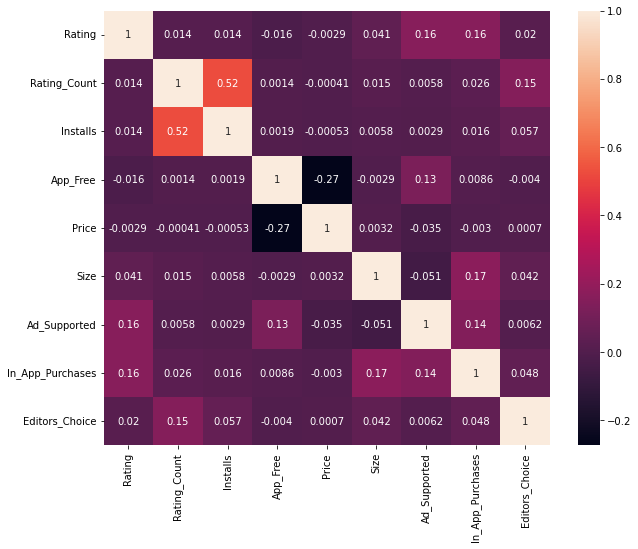

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(b.corr(),annot=True)
plt.plot()